## IMPORTING LIBARIRES:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os, glob
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D,GlobalAveragePooling2D,Input
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

## Data Loading:

In [3]:
data_dir = r"data\train"
leaf=[]
for file in os.listdir(data_dir):
    leaf+=[file]
print(leaf)
print(len(leaf))

['fake', 'real']
2


## PREPROCESSING:

In [4]:
img_height,img_width=256,256
batch_size=20

train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.3)
train_generator = train_datagen.flow_from_directory(data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='training')
test_generator = train_datagen.flow_from_directory(data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='validation')

Found 348 images belonging to 2 classes.
Found 148 images belonging to 2 classes.


## MOBILENET ALGORITHM:

In [5]:
base_model = tf.keras.applications.MobileNet(input_shape=(img_height,img_width, 3), include_top=False,
                          weights='imagenet')
model1 = Sequential()
model1.add(base_model)
model1.add(GlobalAveragePooling2D())
model1.add(Dense(64, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(Dense(2, activation='sigmoid'))
model1.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 8, 8, 1024)        3228864   
 onal)                                                           
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 64)                65600     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                      

In [6]:
model1.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy"])
hist1=model1.fit_generator(train_generator,epochs=20,validation_data=test_generator,verbose=1)

C:\Users\0618\AppData\Local\Temp\ipykernel_13224\4244930103.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist1=model1.fit_generator(train_generator,epochs=20,validation_data=test_generator,verbose=1)


Epoch 1/20


18/18 [==============================] - 64s 3s/step - loss: 0.3583 - accuracy: 0.8592 - val_loss: 6.3549 - val_accuracy: 0.5135
Epoch 2/20
18/18 [==============================] - 43s 2s/step - loss: 0.0689 - accuracy: 0.9856 - val_loss: 5.3538 - val_accuracy: 0.5135
Epoch 3/20
18/18 [==============================] - 41s 2s/step - loss: 0.0449 - accuracy: 0.9885 - val_loss: 3.7804 - val_accuracy: 0.5135
Epoch 4/20
18/18 [==============================] - 44s 2s/step - loss: 0.0459 - accuracy: 0.9856 - val_loss: 1.9382 - val_accuracy: 0.5811
Epoch 5/20
18/18 [==============================] - 42s 2s/step - loss: 0.0539 - accuracy: 0.9799 - val_loss: 2.0290 - val_accuracy: 0.5676
Epoch 6/20
18/18 [==============================] - 43s 2s/step - loss: 0.0509 - accuracy: 0.9799 - val_loss: 0.6100 - val_accuracy: 0.7568
Epoch 7/20
18/18 [==============================] - 42s 2s/step - loss: 0.0429 - accuracy: 0.9914 - val_loss: 1.3625 - val_accuracy: 0.7635
Epoch 8/20
18/18 [

## GARPH:

TypeError: _process_plot_var_args.__call__() got multiple values for argument 'axes'

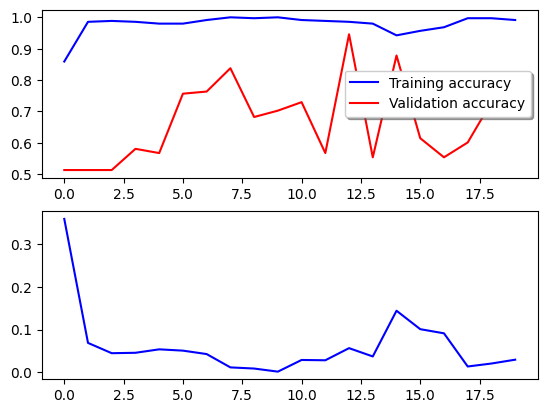

In [7]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist1.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(hist1.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist1.history['loss'], color='b', label="Training loss")
ax[1].plot(hist1.history['val_loss'], color='r', label="validation loss",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

## SAVING MODEL:

In [8]:
model1.evaluate(test_generator)
model1.save("MobileNet.h5")

8/8 [==============================] - 7s 755ms/step - loss: 1.1671 - accuracy: 0.7838


C:\Users\0618\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
